In [19]:
import os
import shutil
import random #for random distribution of data
from shutil import copyfile
from os import getcwd  # getcwd returns current working directory
import pandas as pd #for data manipulation
import numpy as np #for operation
import tensorflow as tf
from tensorflow.keras.preprocessing import image # for image processing
import matplotlib.pyplot as plt

In [3]:
print( f"{getcwd()}/datasets/CK+48/")

C:\Users\SHASHI KUMAR\jupyter_folders\project/datasets/CK+48/


# Load Data
Dataset is downloaded from Kaggle as it's link is given in Lit Review 2.0. 
After extracting : datasets(a directory) contains CK+48 (another directory) which contains folders of different classes 


In [4]:
## load data

path = f"{getcwd()}/datasets/CK+48/" # access the path
shutil.rmtree(f"{getcwd()}/datasets/" +'/tmp', ignore_errors= True)  # remove that directory tree if tmp named directory exists
class_name = ['anger', 'contempt','disgust','fear','happy','sadness','surprise']
for name in class_name:
    print(name +': ',len(os.listdir(path + name))) # 
 


anger:  135
contempt:  54
disgust:  177
fear:  75
happy:  207
sadness:  84
surprise:  249


In below cell, tmp directory is created.Then inside tmp directory two training and testing directory created. 

In [5]:
path1 = f"{getcwd()}/datasets/"
class_name = ['anger', 'contempt','disgust','fear','happy','sadness','surprise']
try:
    os.mkdir(path1 + '/tmp/') 
    os.mkdir(path1 + '/tmp/training/')
    os.mkdir(path1 + '/tmp/testing/')
    for name in class_name:
        os.mkdir(path1 + '/tmp/training/' + name)
        os.mkdir(path1 + '/tmp/testing/' + name)
    
except OSError:
    print('File already occured or some error')
#    

In [6]:
# split function is used to split data in two parts training and testing.

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    l = os.listdir(SOURCE)
    x = int(len(l)*SPLIT_SIZE)
    random.sample(l,len(l))
    for i,fn in enumerate(l):
        if i<x:
            path = os.path.join(SOURCE ,fn)
            path_t = os.path.join(TRAINING ,fn)
            if os.path.getsize(path) > 0:
                copyfile(path, path_t)
        else:
            path = os.path.join(SOURCE ,fn)
            path_t = os.path.join(TESTING ,fn)
            if os.path.getsize(path) > 0:
                copyfile(path, path_t)

In [7]:
SOURCE_DIR = f"{getcwd()}/datasets/CK+48/"
TRAINING_DIR = f"{getcwd()}/datasets/tmp/training/"
TESTING_DIR = f"{getcwd()}/datasets/tmp/testing/"
split_size = .9
for name in class_name:
    split_data(SOURCE_DIR + name , TRAINING_DIR + name,TESTING_DIR + name,split_size)
    


In [9]:
print('After splitting Between Training and Testing and split size is ', split_size )
print('Training part contains')
for name in class_name:
    print(name + ':',len(os.listdir(TRAINING_DIR + name)))
print('Testing part contains')
for name in class_name:
    print(name + ':',len(os.listdir(TESTING_DIR + name)))


After splitting Between Training and Testing and split size is  0.9
Training part contains
anger: 121
contempt: 48
disgust: 159
fear: 67
happy: 186
sadness: 75
surprise: 224
Testing part contains
anger: 14
contempt: 6
disgust: 18
fear: 8
happy: 21
sadness: 9
surprise: 25


# Preprocessing



In [43]:
##basic Cnn model 

def CNN_model(num_classes,input_shape):
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', name = 'conv2d_1', input_shape = input_shape),
        tf.keras.layers.MaxPooling2D((2,2), name = 'max_pool_1'),
        
        tf.keras.layers.Conv2D(64,(5,5), activation = 'relu', name = 'conv2d_2'),
        tf.keras.layers.MaxPooling2D((2,2), name = 'max_pool_2'),
        
        tf.keras.layers.Flatten(name = 'flatten_1'),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes,activation = 'softmax')
    ])
    
    
    return model
    
    
    

In [44]:
## compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = CNN_model(7, (150,150,1))
model.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [45]:
# image augmentation
class myCallback (tf.keras.callbacks.Callback):
    def steps_per_epoch(self, epoch, logs = {}):
        if logs['acc'] > 0.95 :
            print('\nAccuracy reached 95%')
            self.model.stop_training = True


train_datagen = image.ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 2,
    horizontal_flip =True
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size = 16,color_mode = 'grayscale', class_mode = 'categorical',target_size = (150,150))

validation_datagen = image.ImageDataGenerator(rescale = 1./255,
                                             rotation_range=2,
                                             horizontal_flip = True)
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR, batch_size = 16,color_mode = 'grayscale', class_mode = 'categorical',target_size = (150,150))





Found 880 images belonging to 7 classes.
Found 101 images belonging to 7 classes.


In [46]:
mycallback = myCallback()
history = model.fit_generator(train_generator, epochs = 20,validation_data=validation_generator, callbacks = [mycallback] )

Epoch 1/20
55/55 [==============================] - 50s 910ms/step - loss: 1.7327 - acc: 0.4045 - val_loss: 1.0544 - val_acc: 0.6733
Epoch 2/20
55/55 [==============================] - 47s 862ms/step - loss: 0.7344 - acc: 0.7420 - val_loss: 0.6445 - val_acc: 0.7723
Epoch 3/20
55/55 [==============================] - 48s 871ms/step - loss: 0.3822 - acc: 0.8648 - val_loss: 0.9212 - val_acc: 0.7228
Epoch 4/20
55/55 [==============================] - 51s 920ms/step - loss: 0.2779 - acc: 0.8966 - val_loss: 0.5105 - val_acc: 0.8218
Epoch 5/20
55/55 [==============================] - 49s 898ms/step - loss: 0.1618 - acc: 0.9420 - val_loss: 0.6679 - val_acc: 0.8119
Epoch 6/20
55/55 [==============================] - 49s 896ms/step - loss: 0.1350 - acc: 0.9557 - val_loss: 0.6992 - val_acc: 0.7525
Epoch 7/20
55/55 [==============================] - 50s 918ms/step - loss: 0.1225 - acc: 0.9625 - val_loss: 0.3799 - val_acc: 0.8218
Epoch 8/20
55/55 [==============================] - 51s 926ms/step - 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Training and validation loss')

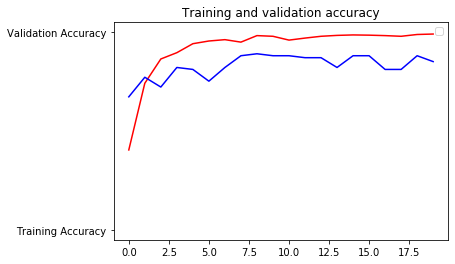

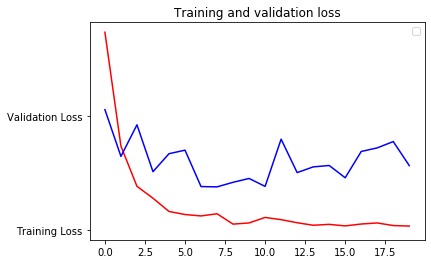

In [47]:
%matplotlib inline

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.legend()

plt.title('Training and validation loss')